# EDA

Wednesday
- [x] Downloading data
- [ ] Data cleaning
    - [x] Missing data
    - [ ] Duplicates # I want to work with average sales prices only, so the duplicate houses should not be dropped
    - [x] Data types
    - [x] Values written in different formats
    - [x] EDA: descriptive statistics
    - [x] Research questions based on case
    - [x] Hypothesis generation
        - [x] Exploring by plotting
Thursday morning
- [ ] Answer hypotheses with plots
    - [x] The poorer, the cheaper
    - [x] 
    - [x] Define subset from zipcodes as "poor" neighborhoods

Thursday afternoon
- [x] Come up with a narrative
- [x] Make the presentation using the plots from the morning

Friday
- [x] Refine presentation and notes
- [x] Add backup slides

# Research questions

Client provile: Erin Robinson
- Buyer
- Invest in poor neighborhood
- buying & selling
- costs back + little profit
- socially responsible

Assumptions to make
- what are "poor neighborhoods" – areas with cheap prices
- how much is a "little profit"
- how do you invest "socially responsible"

Goals
- list of zip codes to invest in
- profit range that makes an investment "a little profit"
- list of houses in neighborhoods that already have a few expensive houses, that are in bad condition, so that a renovation would be "socially responsible" – going against gentrification

Research questions
1. What are areas with cheap prices
1. Are house prices cheaper in poorer areas?
1. Which houses are in bad condition and in areas with a big price range

Hypotheses
1. The lower the mean of the prices in a zip code, the poorer the neighborhood
    - mean per zip code, bar chart -> subset of zip codes
    - Answer: the distribution of house prices show no indication of poverty
1. The bigger the std of the prices in the subset of zip codes of poor areas, the more potential for gentrification
    - mean per zip code, bar chart, find cutoff for gentrification-range
1. The bigger the difference between original price and sale price, the bigger the profit


In [165]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Display more columns and rows in the notebook
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)

sns.set_theme()


In [166]:
df = pd.read_csv('data/eda.csv', parse_dates=['date'])


## Check df structure

In [167]:
df.shape


(21597, 21)

In [168]:
df.head()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000


In [169]:
df.dtypes


id                        int64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
date             datetime64[ns]
price                   float64
dtype: object

In [170]:
df.waterfront.unique()


array([nan,  0.,  1.])

In [171]:
df.view.unique()


array([ 0., nan,  3.,  4.,  2.,  1.])

Should be int:
- bedrooms
- bathrooms
- sqft_living
- sqft_lot
- floors
- view
- sqft_above
- sqft_basement
- yr_renovated
- sqft_living15
- sqft_lot15

Should be bool
- waterfront

Should be str
- zipcode

In [172]:
df.columns


Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price'],
      dtype='object')

___Changing dtypes – see below missing values___

## Descriptive statistics

Observations
- Prices have a very high range. Mostly outliers over 1 million
- Vast majority of houses are of middle condition, less houses in worse condition than in better


In [173]:
df.price.describe()


count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

<Axes: >

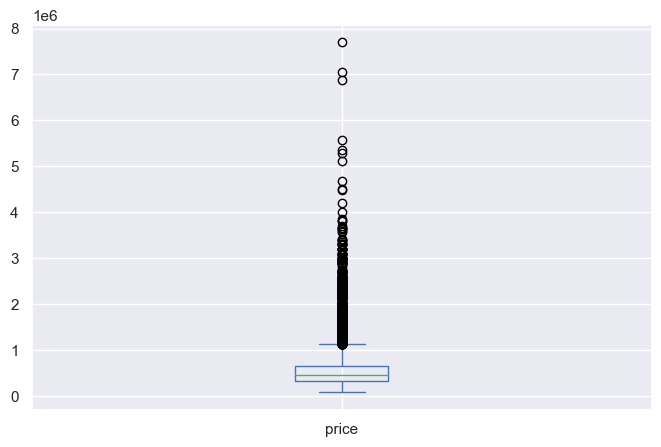

In [174]:
df.price.plot(kind='box')


In [175]:
df.condition.describe()


count   21597.000
mean        3.410
std         0.651
min         1.000
25%         3.000
50%         3.000
75%         4.000
max         5.000
Name: condition, dtype: float64

<Axes: xlabel='condition'>

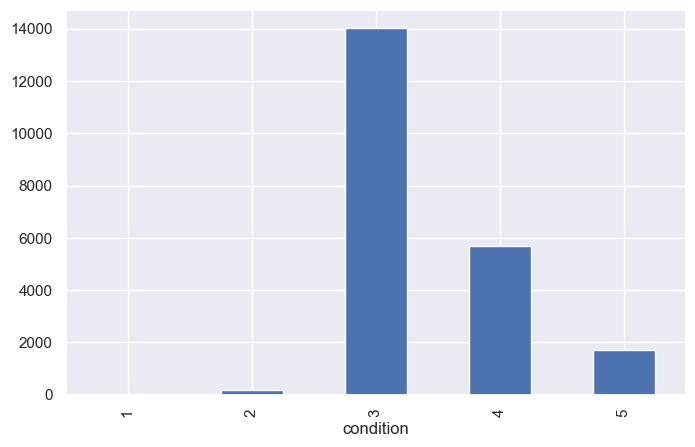

In [176]:
df.groupby('condition')['id'].count().plot(kind='bar')


In [177]:
df.describe()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,2014-10-29 04:20:38.171968512,540296.574
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,2014-05-02 00:00:00,78000.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,2014-07-22 00:00:00,322000.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,2014-10-16 00:00:00,450000.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,2015-02-17 00:00:00,645000.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,2015-05-27 00:00:00,7700000.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,NaN,367368.140


In [178]:
# Make a df with average house prices and n of houses

zip_count = df.groupby('zipcode').id.count().rename('houses_count')
zip_price = df.groupby('zipcode').price.mean().rename('average_price')

df_zip_count_mean = pd.concat([zip_count, zip_price], axis=1)

# make the index a string
df_zip_count_mean = df_zip_count_mean.reset_index()
df_zip_count_mean['zipcode'] = df_zip_count_mean.zipcode.astype(str)
print(df_zip_count_mean.dtypes)
df_zip_count_mean = df_zip_count_mean.set_index('zipcode')
df_zip_count_mean


zipcode           object
houses_count       int64
average_price    float64
dtype: object


,houses_count,average_price
zipcode,,
98001,361,281194.870
98002,199,234284.035
98003,280,294111.279
98004,317,1356523.991
98005,168,810289.696
...,...,...
98177,255,676419.392
98178,262,310612.756
98188,136,289078.346


<Axes: xlabel='houses_count', ylabel='average_price'>

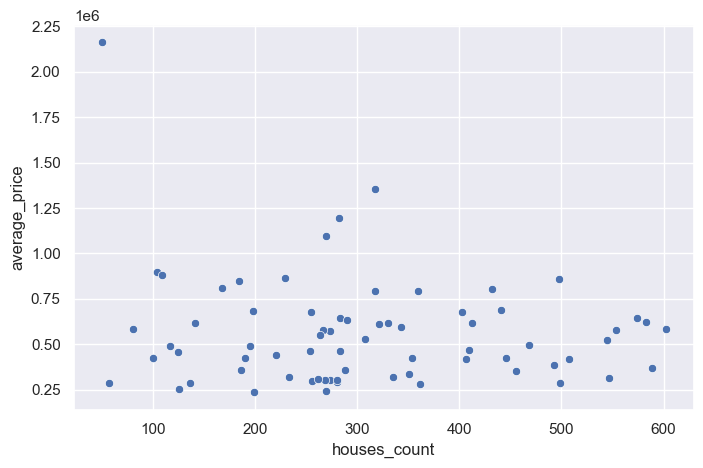

In [179]:
sns.scatterplot(data=df_zip_count_mean, x='houses_count', y='average_price')


In [180]:
# Check if there are apartment buildings in the dataset

df.floors.describe()


count   21597.000
mean        1.494
std         0.540
min         1.000
25%         1.000
50%         1.500
75%         2.000
max         3.500
Name: floors, dtype: float64

## Missing values

- Missing values that are explainable
    - waterfront NaN is probably a no or False (0) -> fillna(0)
    - sqft_basement: property does not have a basement -> fillna(0) because other houses have 0 too
    - yr_renovated: no renovation yet -> fillna(0)
    - view: since there are very few houses with a view so exceptional that it is rated, I assume that the houses with a NaN view simply have a 0-rated view -> fillna(0)

So, all NaNs can be filled with 0

In [181]:
import missingno as msno


In [182]:
# NaN counts
df.isna().sum()


id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

<Axes: >

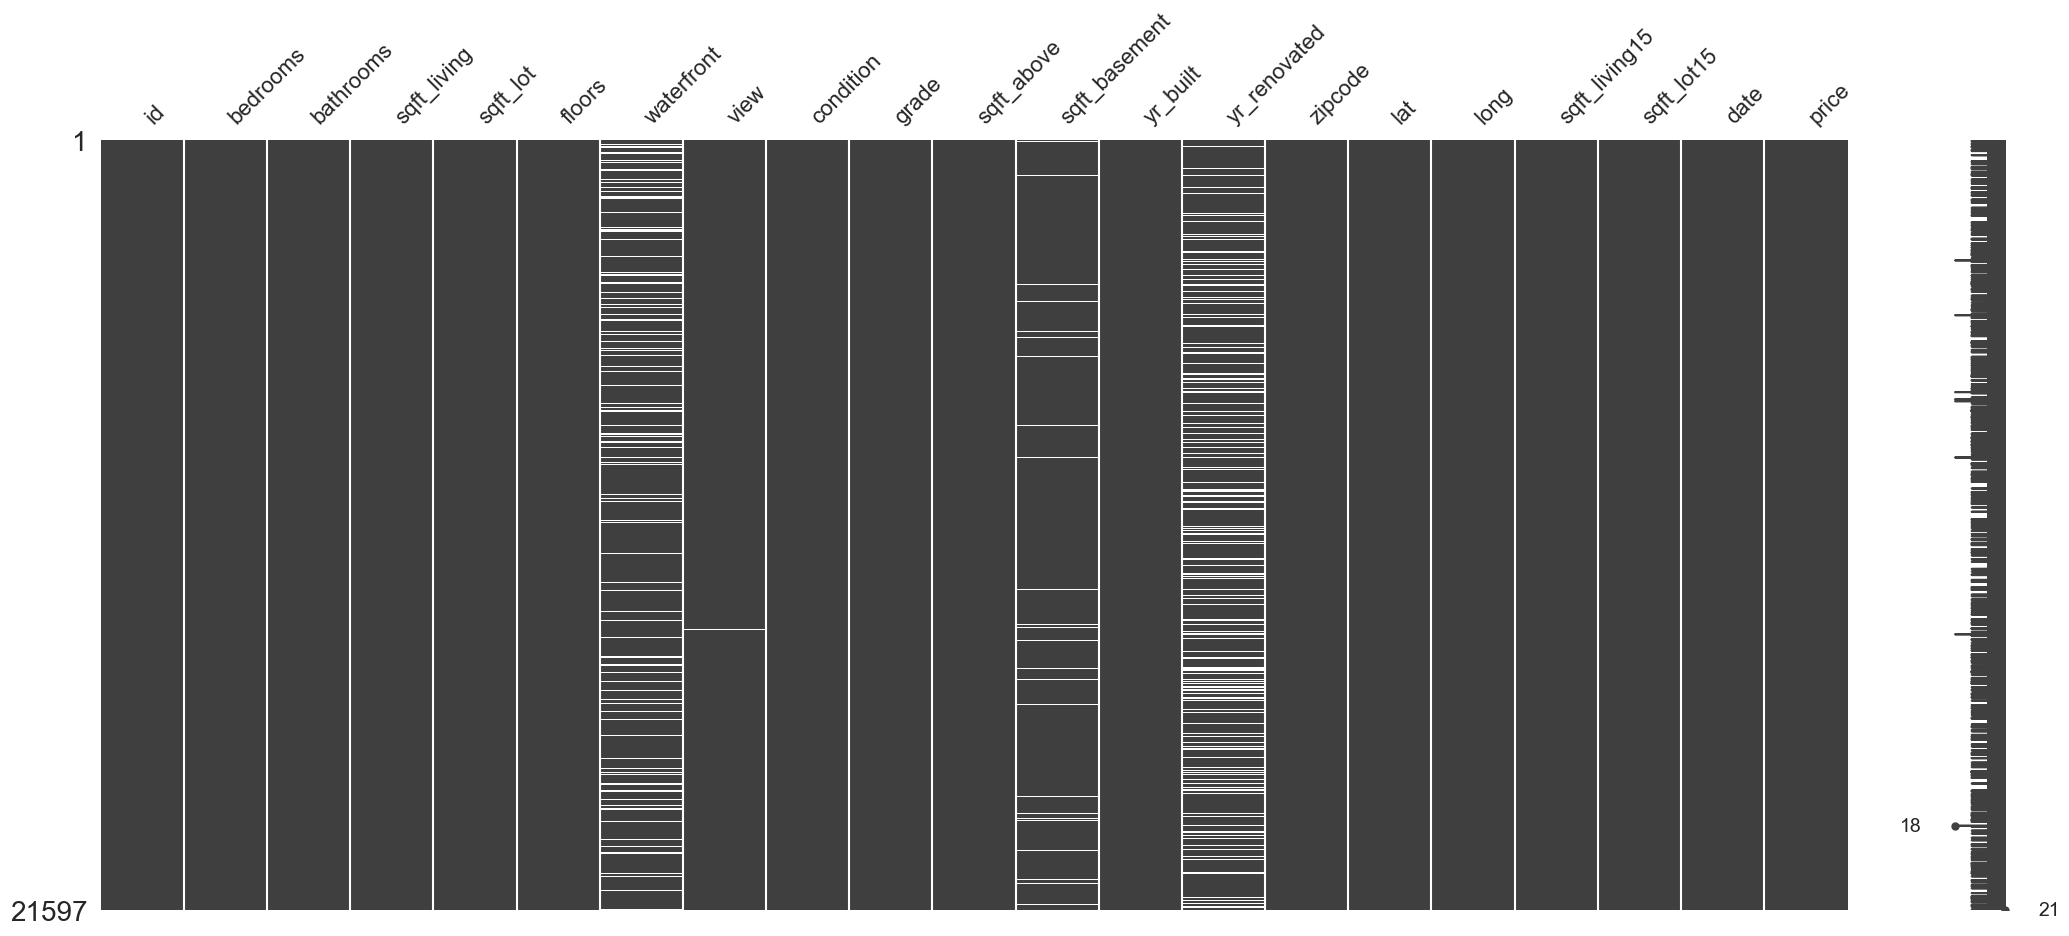

In [183]:
# Plot missing data

msno.matrix(df)


<Axes: xlabel='view'>

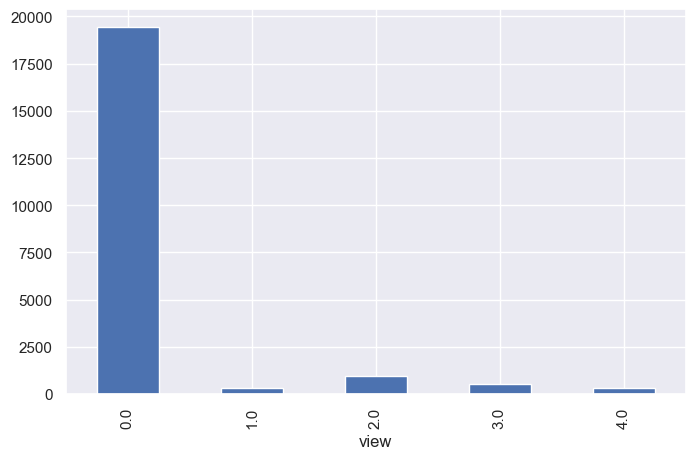

In [184]:
# Mentionable view is rare

df.view.value_counts().sort_index().plot(kind='bar')


<Axes: xlabel='waterfront'>

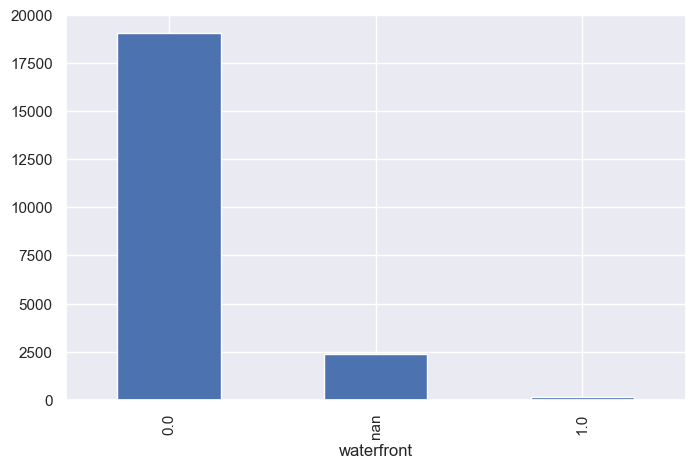

In [185]:
# Waterfront is often missing but since there are so fiew properties with waterfront
# we can assume that it wasn't entered because it's not applying to the property, so no waterfront
df.waterfront.value_counts(sort=True, dropna=False).plot(kind='bar')


In [186]:
df.waterfront.value_counts(sort=True, dropna=False)


waterfront
0.000    19060
NaN       2391
1.000      146
Name: count, dtype: int64

In [187]:
# Check if NaN in view has something to do with its general condition but 

df[df.view.isna()].grade.value_counts().sort_index()


grade
6      7
7     26
8     12
9     11
10     4
11     2
12     1
Name: count, dtype: int64

<Axes: xlabel='grade'>

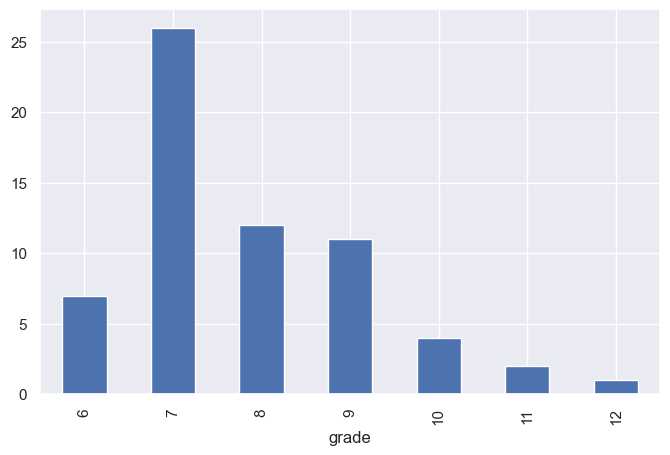

In [188]:
df[df.view.isna()].grade.value_counts().sort_index().plot(kind='bar')


<Axes: xlabel='grade'>

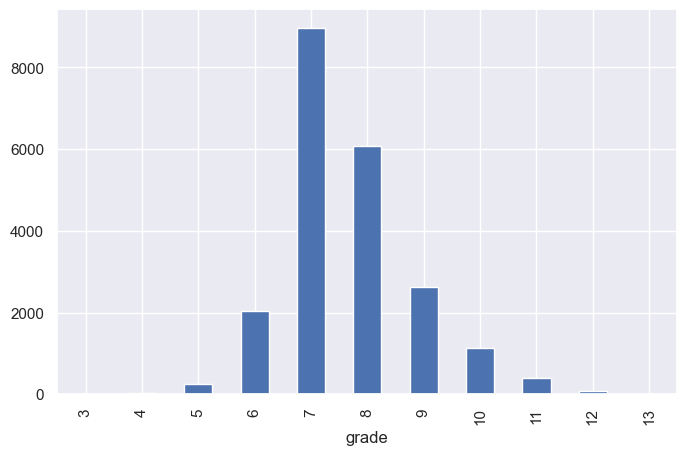

In [189]:
# Distribution of houses with NaN view look very similar to the distribution if grades in the whole dataset
df.grade.value_counts().sort_index().plot(kind='bar')


In [190]:
# Check if there is no basement, other houses have 0 sqft_basement
df[df.sqft_basement < 1]


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000
7,2008000270,3.000,1.500,1060.000,9711.000,1.000,0.000,NaN,3,7,1060.000,0.000,1963,0.000,98198,47.410,-122.315,1650.000,9711.000,2015-01-15,291850.000
9,3793500160,3.000,2.500,1890.000,6560.000,2.000,0.000,0.000,3,7,1890.000,0.000,2003,0.000,98038,47.368,-122.031,2390.000,7570.000,2015-03-12,323000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3.000,2.500,1530.000,1131.000,3.000,0.000,0.000,3,8,1530.000,0.000,2009,0.000,98103,47.699,-122.346,1530.000,1509.000,2014-05-21,360000.000
21593,6600060120,4.000,2.500,2310.000,5813.000,2.000,0.000,0.000,3,8,2310.000,0.000,2014,0.000,98146,47.511,-122.362,1830.000,7200.000,2015-02-23,400000.000
21594,1523300141,2.000,0.750,1020.000,1350.000,2.000,0.000,0.000,3,7,1020.000,0.000,2009,0.000,98144,47.594,-122.299,1020.000,2007.000,2014-06-23,402101.000
21595,291310100,3.000,2.500,1600.000,2388.000,2.000,NaN,0.000,3,8,1600.000,0.000,2004,0.000,98027,47.535,-122.069,1410.000,1287.000,2015-01-16,400000.000


In [191]:
df.fillna(0, inplace=True)


In [192]:
df.isna().sum().sum()


0

## Cleaning up data types, values

In [193]:
# Are prices all rounded?
#df.price = df.price.round(decimals=2)
prices = df.price.to_string().split('.')
for price in prices:
    if price.startswith('0'):
        pass
    else:
        print(price)
# All prices are round, so change to int
df.price = df.price.astype(int)


In [194]:
# As long as there are NaN-values in the df, the dtypes cannot be changed

df = df.astype({
    'bedrooms': int, 
    'bathrooms': int, 
    'sqft_living': int, 
    'sqft_lot': int, 
    'floors': int,
    'view': int,
    'sqft_above': int,
    'sqft_basement': int,
    'yr_renovated': int,
    'sqft_living15': int,
    'sqft_lot15': int,
    'waterfront': bool,
    'zipcode': str
})


In [195]:
# Year renovated is 10x too big
df[df['yr_renovated']>0].yr_renovated


1        19910
35       20020
95       19910
103      20100
125      19920
         ...  
19602    20040
20041    20060
20428    20090
20431    20140
20946    20070
Name: yr_renovated, Length: 744, dtype: int64

In [196]:
df.eval('yr_renovated = yr_renovated / 10', inplace=True)
df.yr_renovated = df.yr_renovated.astype(int)


## Continuous and categorical data

In [197]:
for column in df.columns:
    value_list = df[column].value_counts()
    if value_list.size < 100:
        print(column)


bedrooms
bathrooms
floors
waterfront
view
condition
grade
yr_renovated
zipcode


In [198]:
df.view.value_counts().sort_index()


view
0    19485
1      330
2      957
3      508
4      317
Name: count, dtype: int64

In [199]:
df.condition.value_counts().sort_index()


condition
1       29
2      170
3    14020
4     5677
5     1701
Name: count, dtype: int64

In [200]:
df.grade.value_counts().sort_index()


grade
3        1
4       27
5      242
6     2038
7     8974
8     6065
9     2615
10    1134
11     399
12      89
13      13
Name: count, dtype: int64

In [201]:
df.zipcode.value_counts().sort_index()


zipcode
98001    361
98002    199
98003    280
98004    317
98005    168
        ... 
98177    255
98178    262
98188    136
98198    280
98199    317
Name: count, Length: 70, dtype: int64

In [202]:
df.head()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3,1,1180,5650,1,False,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,2014-10-13,221900
1,6414100192,3,2,2570,7242,2,False,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014-12-09,538000
2,5631500400,2,1,770,10000,1,False,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,2015-02-25,180000
3,2487200875,4,3,1960,5000,1,False,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,2014-12-09,604000
4,1954400510,3,2,1680,8080,1,False,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2015-02-18,510000


Categorical data
- id: unique to a house
- waterfront (yes/no)
- view 0 - 4
- condition: 1-5
- grade: 1-13
- zipcode: 70 unique from 98001 - 98199

Continuous data
- bedrooms
- bathrooms
- sqft_living
- sqft_lot
- floors
- sqft_above
- sqft_basement
- yr_built
- yr_renovated
- date
- price


In [203]:
sns.set_theme(context='talk')


<Axes: xlabel='zipcode'>

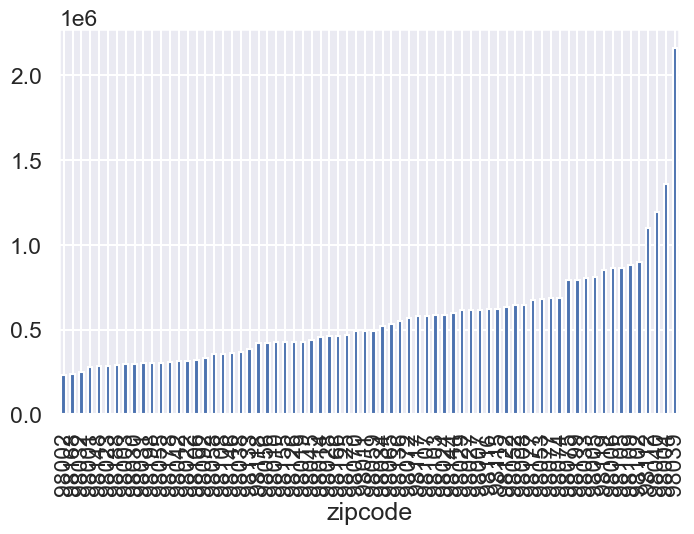

In [204]:
# Find "poor neighborhoods"

df.groupby('zipcode').price.mean().rename('price_mean').sort_values().plot(kind='bar')


<Axes: xlabel='price', ylabel='Count'>

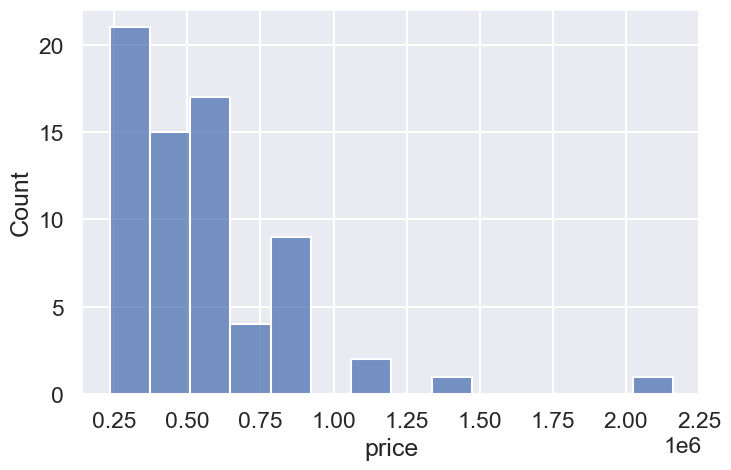

In [205]:
sns.histplot(df.groupby('zipcode').price.mean())


In [206]:
# For convenience, make a df with mean and standard deviation of house prices per ZIP code

zip_prices_mean = df.groupby('zipcode').price.mean().rename('price_mean')
zip_prices_std = df.groupby('zipcode').price.std().rename('price_std')

zip_prices = pd.concat([zip_prices_mean, zip_prices_std], axis=1)
zip_prices


,price_mean,price_std
zipcode,,
98001,281194.870,98837.431
98002,234284.035,52041.449
98003,294111.279,107597.662
98004,1356523.991,746094.067
98005,810289.696,268979.168
...,...,...
98177,676419.392,436379.740
98178,310612.756,161044.746
98188,289078.346,103106.580


Text(0, 0.5, 'Mean price')

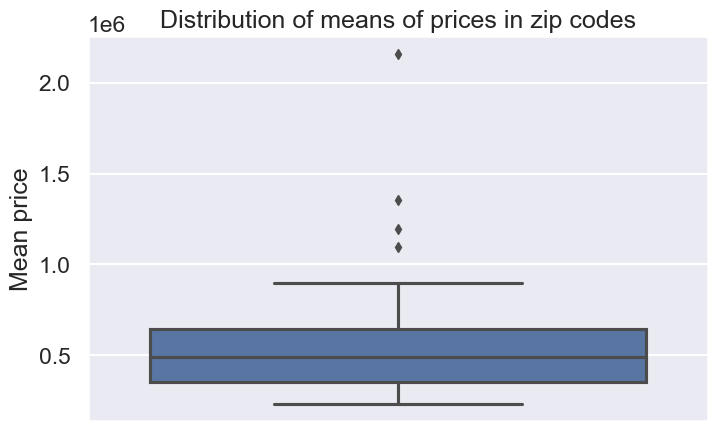

In [207]:
# Looking at the distribution of means of prices over the zip codes

sns.boxplot(data=zip_prices_mean.reset_index(), y='price_mean')
plt.title('Distribution of means of prices in zip codes')
plt.ylabel('Mean price')


<Axes: xlabel='price_mean', ylabel='zipcode'>

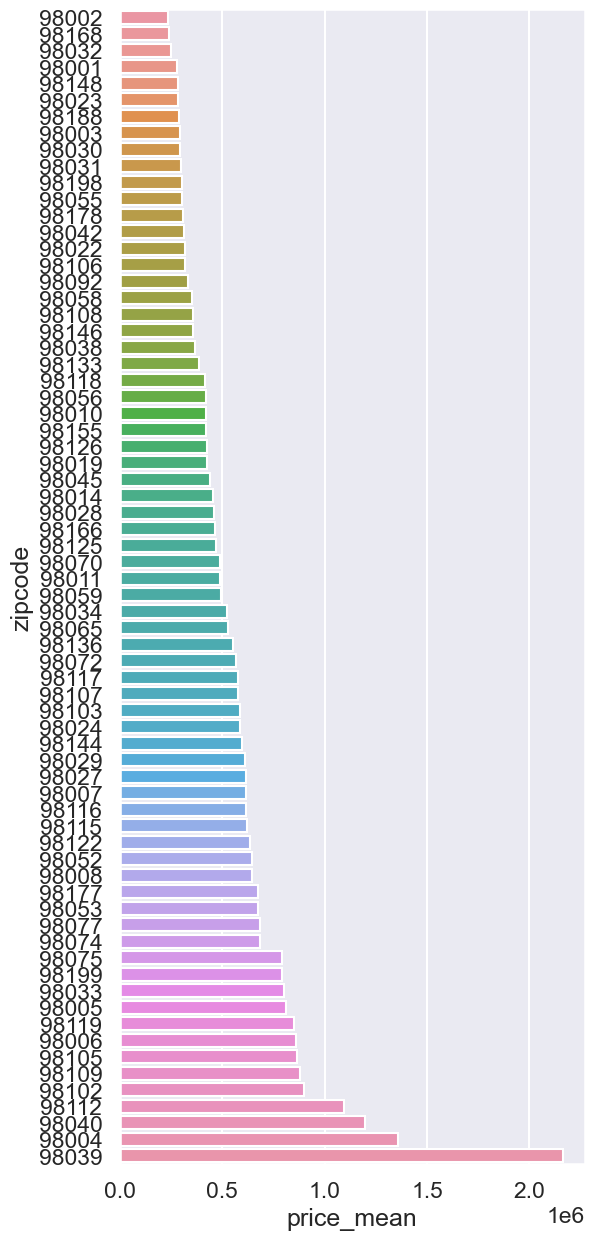

In [208]:

f, ax = plt.subplots(figsize=(6, 15))

sns.barplot(y='zipcode', x='price_mean', data=zip_prices.sort_values(by='price_mean').reset_index())



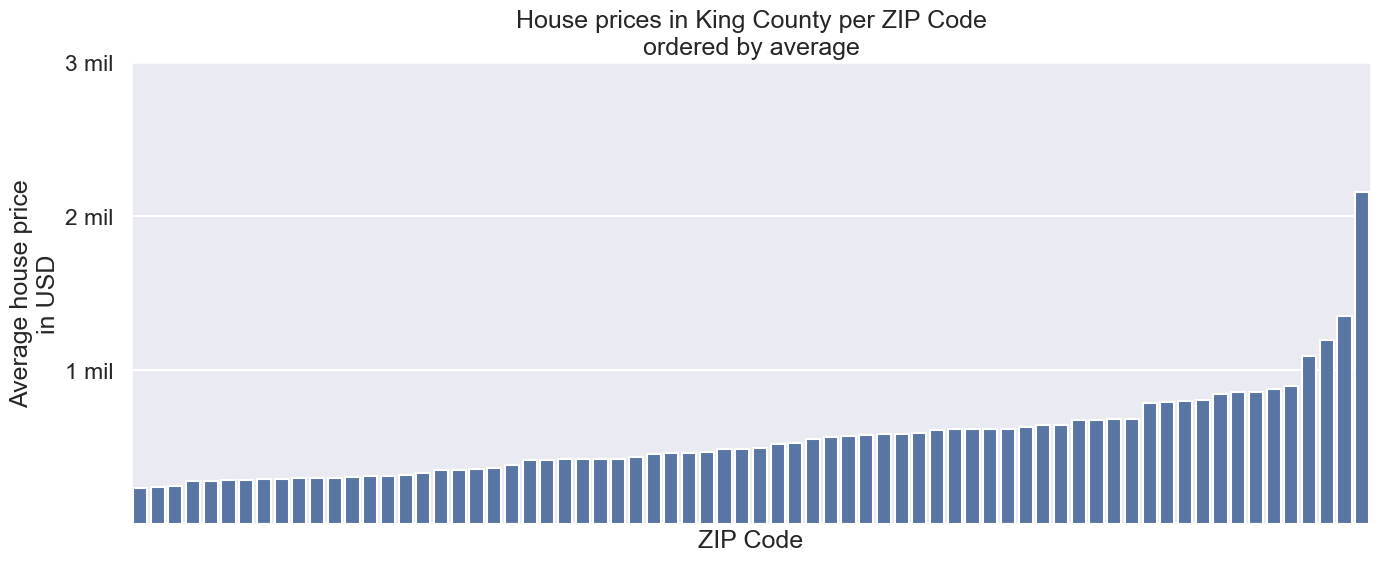

In [209]:
# Plot for presentatio: WITHOUT STD
sns.set_theme(context='talk', style='darkgrid', palette='deep', color_codes=True)

f, ax = plt.subplots(figsize=(16, 6))

sns.barplot(data=df, 
            y='price', 
            x='zipcode', 
            errorbar=None, 
            order=zip_prices.reset_index().sort_values(by='price_mean').zipcode.reset_index(drop=True),
            color='b')

plt.xticks([])
plt.xlabel('ZIP Code')

plt.yticks([1000000, 2000000, 3000000], ['1 mil', '2 mil', '3 mil'])
plt.ylabel('Average house price\nin USD')

plt.title('House prices in King County per ZIP Code\nordered by average')

plt.savefig('price_avg.png', dpi=300, bbox_inches='tight')


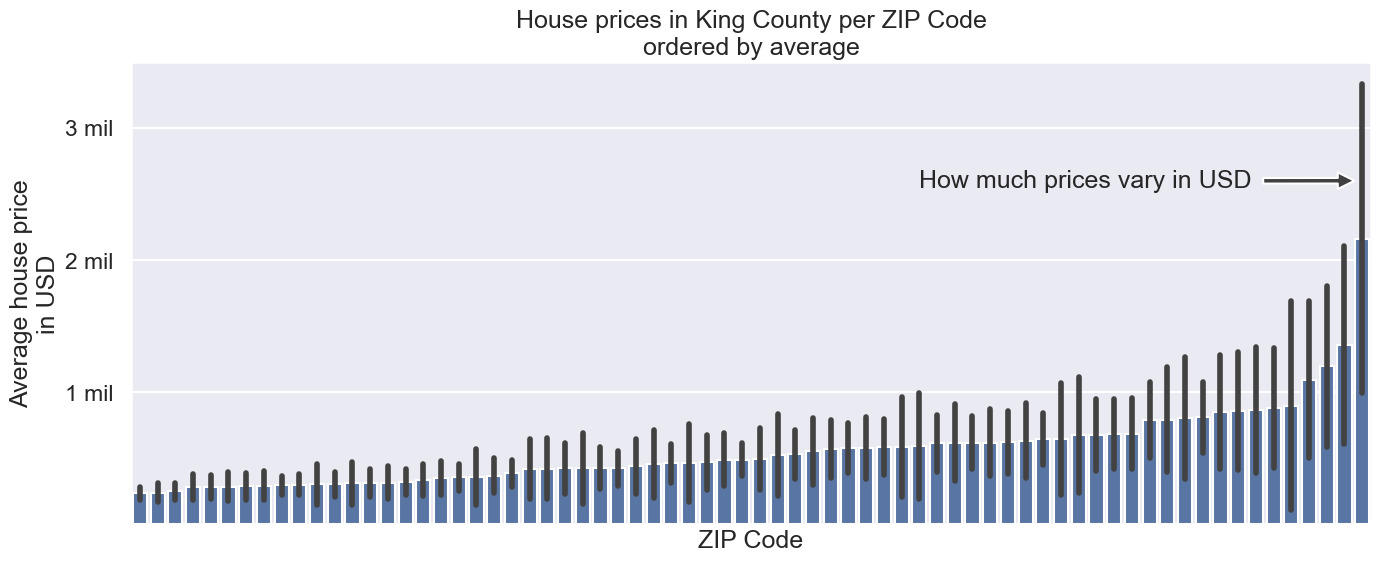

In [210]:
# Plot for presentation: WITH STD

sns.set_theme(context='talk', style='darkgrid', palette='deep', color_codes=True)

f, ax = plt.subplots(figsize=(16, 6))

sns.barplot(
    data=df, 
    y='price', 
    x='zipcode', 
    errorbar='sd', 
    order=zip_prices.reset_index().sort_values(by='price_mean').zipcode.reset_index(drop=True),
    color='b')

plt.xticks([])
plt.xlabel('ZIP Code')

plt.yticks([1000000, 2000000, 3000000], ['1 mil', '2 mil', '3 mil'])
plt.ylabel('Average house price\nin USD')

plt.title('House prices in King County per ZIP Code\nordered by average')

plt.annotate('How much prices vary in USD', 
             xy=(69, 2600000), 
             xytext=(44, 2550000), 
             arrowprops=dict(facecolor='0.25', shrink=0.07)
             )

plt.savefig('price_avg_std.png', dpi=300, bbox_inches='tight')


# Learning: I cannot assume poverty from the data alone

Importing poverty estimate from US census bureau: S1701 | POVERTY STATUS IN THE PAST 12 MONTHS, 2014 ACS 5-Year Estimate

[Link to map](https://data.census.gov/map?060XX00US5303392928_310XX00US42660$8600000/ACSST5Y2014/S1701?q=poverty%20seattle%20zipcode&layer=VT_2014_860_00_PY_D1&mode=thematic&loc=47.5195,-122.0476,z7.3874)

U.S. Census Bureau. (2014). POVERTY STATUS IN THE PAST 12 MONTHS . American Community Survey, ACS 5-Year Estimates Subject Tables, Table S1701. Retrieved December 14, 2023, from [https://data.census.gov/table/ACSST5Y2014.S1701?q=poverty seattle zipcode&g=060XX00US5303392928_310XX00US42660$8600000](https://data.census.gov/table/ACSST5Y2014.S1701?q=poverty%20seattle%20zipcode&g=060XX00US5303392928_310XX00US42660$8600000).

In [211]:
# Read in Text file containing a table with poverty rates estimates for 2014 (5ys)
f = open('data/kind_county_poverty.txt', 'r')
l = f.readlines()
l


['ZCTA5 98001\n',
 '23.6%\n',
 'ZCTA5 98002\n',
 '25.2%\n',
 'ZCTA5 98003\n',
 '26.4%\n',
 'ZCTA5 98004\n',
 '21.4%\n',
 'ZCTA5 98005\n',
 '25.3%\n',
 'ZCTA5 98006\n',
 '21.6%\n',
 'ZCTA5 98007\n',
 '24.8%\n',
 'ZCTA5 98008\n',
 '32.6%\n',
 'ZCTA5 98010\n',
 '22.8%\n',
 'ZCTA5 98011\n',
 '20.9%\n',
 'ZCTA5 98012\n',
 '18.5%\n',
 'ZCTA5 98014\n',
 '37.1%\n',
 'ZCTA5 98019\n',
 '12.3%\n',
 'ZCTA5 98020\n',
 '18.1%\n',
 'ZCTA5 98021\n',
 '25.8%\n',
 'ZCTA5 98022\n',
 '24%\n',
 'ZCTA5 98023\n',
 '22%\n',
 'ZCTA5 98024\n',
 '22.7%\n',
 'ZCTA5 98026\n',
 '26.4%\n',
 'ZCTA5 98027\n',
 '14.8%\n',
 'ZCTA5 98028\n',
 '15.7%\n',
 'ZCTA5 98029\n',
 '18.3%\n',
 'ZCTA5 98030\n',
 '24.6%\n',
 'ZCTA5 98031\n',
 '24.2%\n',
 'ZCTA5 98032\n',
 '25.1%\n',
 'ZCTA5 98033\n',
 '20.5%\n',
 'ZCTA5 98034\n',
 '23.6%\n',
 'ZCTA5 98036\n',
 '25.8%\n',
 'ZCTA5 98037\n',
 '25.1%\n',
 'ZCTA5 98038\n',
 '27%\n',
 'ZCTA5 98039\n',
 '36.2%\n',
 'ZCTA5 98040\n',
 '22.9%\n',
 'ZCTA5 98042\n',
 '24.8%\n',
 'ZCTA5 98043\n'

In [212]:
zip_list = []
poverty_list = []

for i, line in enumerate(l):
    
    if i % 2 == 0: # zipcode
        zipcode = line.strip().split()[1]
        print(i)
        print('zipcode:', zipcode)
        zip_list.append(zipcode)
    else: # percent poverty
        poverty = float(line.strip().strip('%'))/100
        print(i)
        print('poverty:', poverty)
        poverty_list.append(poverty)


0
zipcode: 98001
1
poverty: 0.23600000000000002
2
zipcode: 98002
3
poverty: 0.252
4
zipcode: 98003
5
poverty: 0.264
6
zipcode: 98004
7
poverty: 0.214
8
zipcode: 98005
9
poverty: 0.253
10
zipcode: 98006
11
poverty: 0.21600000000000003
12
zipcode: 98007
13
poverty: 0.248
14
zipcode: 98008
15
poverty: 0.326
16
zipcode: 98010
17
poverty: 0.228
18
zipcode: 98011
19
poverty: 0.209
20
zipcode: 98012
21
poverty: 0.185
22
zipcode: 98014
23
poverty: 0.371
24
zipcode: 98019
25
poverty: 0.12300000000000001
26
zipcode: 98020
27
poverty: 0.18100000000000002
28
zipcode: 98021
29
poverty: 0.258
30
zipcode: 98022
31
poverty: 0.24
32
zipcode: 98023
33
poverty: 0.22
34
zipcode: 98024
35
poverty: 0.22699999999999998
36
zipcode: 98026
37
poverty: 0.264
38
zipcode: 98027
39
poverty: 0.14800000000000002
40
zipcode: 98028
41
poverty: 0.157
42
zipcode: 98029
43
poverty: 0.183
44
zipcode: 98030
45
poverty: 0.24600000000000002
46
zipcode: 98031
47
poverty: 0.242
48
zipcode: 98032
49
poverty: 0.251
50
zipcode: 98

In [213]:
# Make df with poverty rate per ZIP code, contains all ZIP codes in King County

df_poverty_complete = pd.DataFrame({'zipcode': zip_list, 'poverty_rate': poverty_list})
df_poverty_complete


,zipcode,poverty_rate
0,98001,0.236
1,98002,0.252
2,98003,0.264
3,98004,0.214
4,98005,0.253
...,...,...
166,98467,0.275
167,98498,0.200
168,98499,0.241
169,98558,0.815


In [214]:
# cleaning poverty rate df

df_poverty_complete.poverty_rate.value_counts()


poverty_rate
-6666666.660    10
0.181            5
0.200            4
0.196            3
0.285            3
                ..
0.281            1
0.199            1
0.321            1
0.010            1
0.815            1
Name: count, Length: 115, dtype: int64

In [215]:
# drop negative values (probably no data)

df_poverty_complete = df_poverty_complete.query('poverty_rate > 0')


In [216]:
# House prices dataset nr of ZIP codes

df.zipcode.unique().size


70

In [217]:
# Poverty rates dataset nr of ZIP codes

df_poverty_complete.zipcode.unique().size


158

In [218]:
np.intersect1d(df.zipcode.unique(), df_poverty_complete.zipcode.unique(), assume_unique=True).size
# All the zipcodes in the house prices dataset are included in the poverty rate data set


70

In [219]:
# Check if zipcode is str
df_poverty_complete.dtypes


zipcode          object
poverty_rate    float64
dtype: object

In [249]:
df_poverty_complete.to_csv('data/king_county_poverty.csv')
df_poverty_complete


,zipcode,poverty_rate
0,98001,0.236
1,98002,0.252
2,98003,0.264
3,98004,0.214
4,98005,0.253
...,...,...
166,98467,0.275
167,98498,0.200
168,98499,0.241
169,98558,0.815


In [221]:
# Poverty rate descriptive statistics

df_poverty_complete.describe()


,poverty_rate
count,158.000
mean,0.229
std,0.086
min,0.010
25%,0.183
50%,0.221
75%,0.260
max,0.815


<Axes: ylabel='Frequency'>

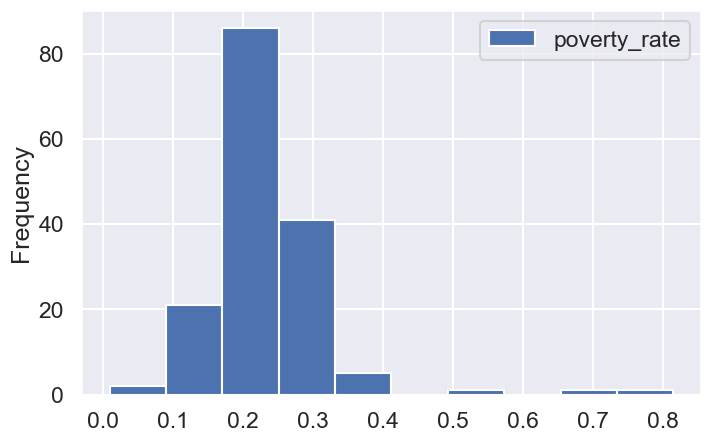

In [222]:
df_poverty_complete.plot(kind='hist')


<Axes: >

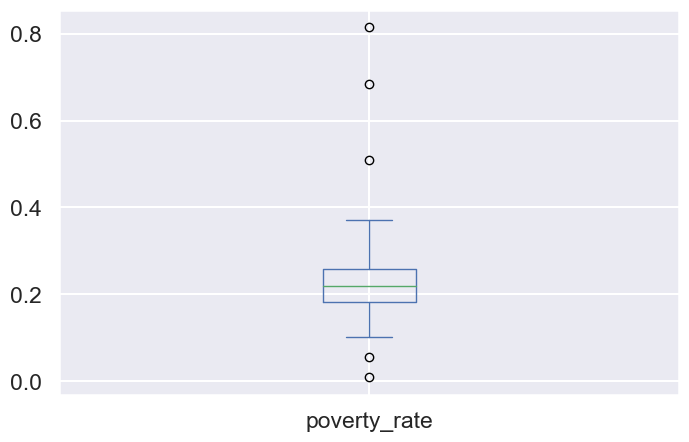

In [223]:
df_poverty_complete.plot(kind='box')


In [224]:
# Save real median of poverty rate from complete poverty rate dataset
# (not just from the subset of zip codes there are in the house df)

poverty_median = df_poverty_complete.poverty_rate.median()
poverty_median


0.2205

In [225]:
# Set the poverty table to only include the zipcodes that are in the house dataset

df_poverty = df_poverty_complete.loc[df_poverty_complete.zipcode.isin(df.zipcode.unique())].copy()
df_poverty


,zipcode,poverty_rate
0,98001,0.236
1,98002,0.252
2,98003,0.264
3,98004,0.214
4,98005,0.253
...,...,...
86,98177,0.273
87,98178,0.207
88,98188,0.234
90,98198,0.212


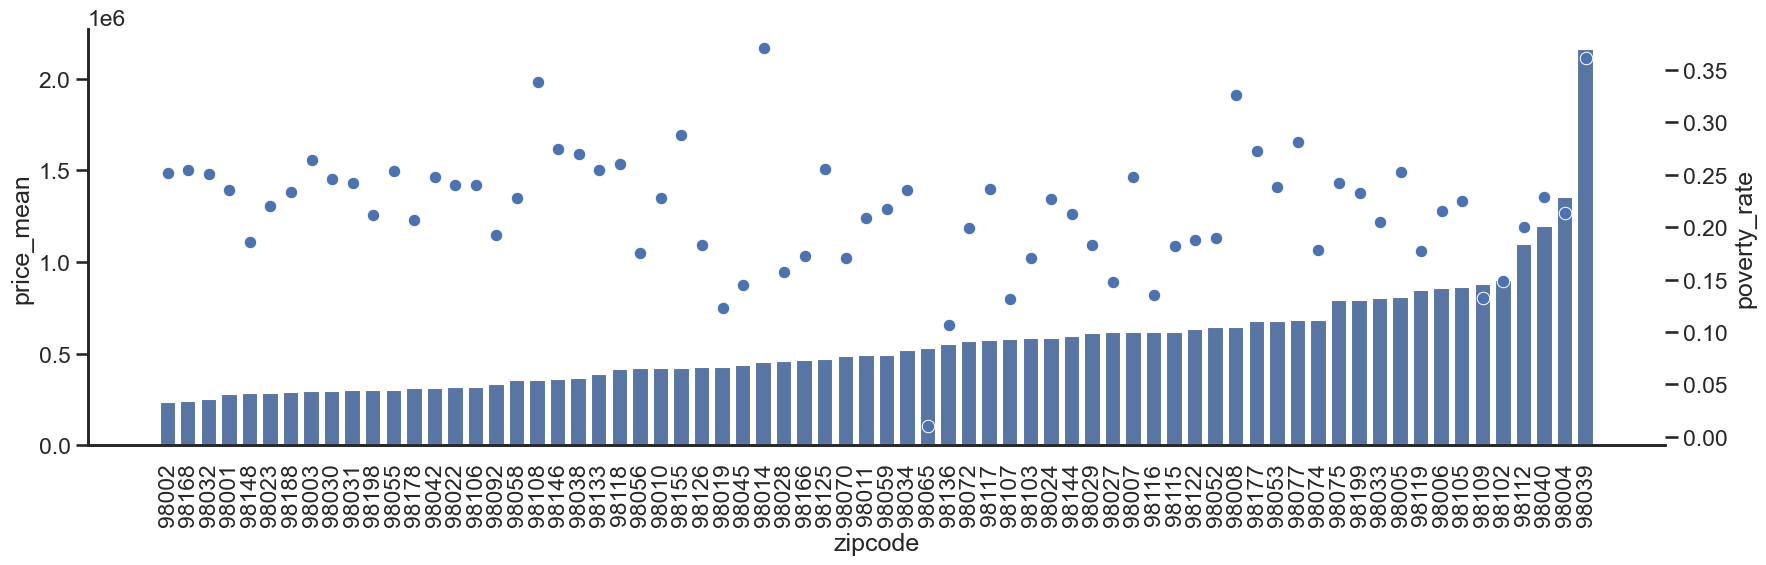

In [226]:
# THIS DOES NOT WORK PROPERLY
# Originally the barplot accessed the original df and compiled the means and the sd for the errorbar, ordered by mean price
# Problem was to align the scatterplot to the custom (ordered by mean) x-axis of the bar plot
# Passing a key to order_values of df_zip_price_poverty did not work properly

# Include poverty rate in plot of house prices

df_zip_price_poverty = pd.concat([zip_prices, df_poverty.set_index('zipcode')], axis=1)
df_zip_price_poverty = df_zip_price_poverty.sort_values(by='price_mean').reset_index()
df_zip_price_poverty

sns.set_style('white')
f, ax = plt.subplots(figsize=(18, 6))

sns.barplot(
    data=df_zip_price_poverty, 
    y='price_mean', 
    x='zipcode',  
    #errorbar='sd', # could be rendered with df_zip_price_poverty.price_std
    color="b" # errorbar color
    )

ax_p = ax.twinx()
sns.scatterplot(
    ax=ax_p, 
    x=ax_p.get_xticks(), 
    y='poverty_rate', 
    data=df_zip_price_poverty # Ordering is the same as barplot, because I now used the df_zip_price_poverty and not df
)

ax.set_xticklabels(df_zip_price_poverty.zipcode, rotation=90) # for data validation see below
f.tight_layout()
sns.despine()


In [227]:
# Validate the graph that the poverty rate matches the mean prices of the zip codes

df_zip_price_poverty


,zipcode,price_mean,price_std,poverty_rate
0,98002,234284.035,52041.449,0.252
1,98168,240328.372,69984.819,0.255
2,98032,251296.240,64705.426,0.251
3,98001,281194.870,98837.431,0.236
4,98148,284908.596,89616.940,0.186
...,...,...,...,...
65,98102,899607.673,790381.367,0.149
66,98112,1096239.007,594223.176,0.200
67,98040,1194873.638,607767.642,0.229
68,98004,1356523.991,746094.067,0.214


### Define a subset of poorer zip codes in house df

<Axes: >

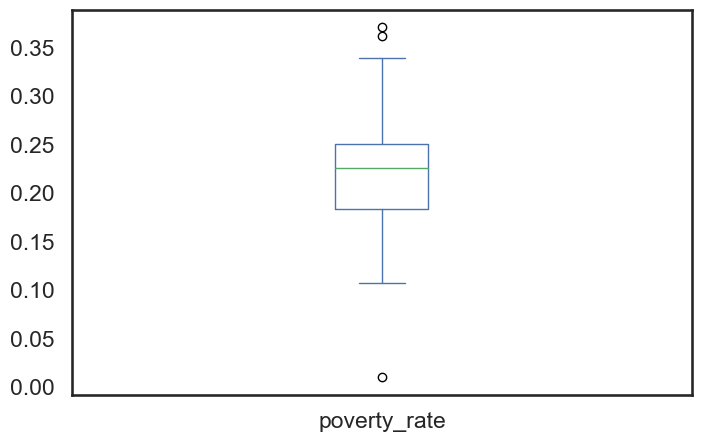

In [228]:
df_poverty.plot(kind='box')


<Axes: ylabel='Frequency'>

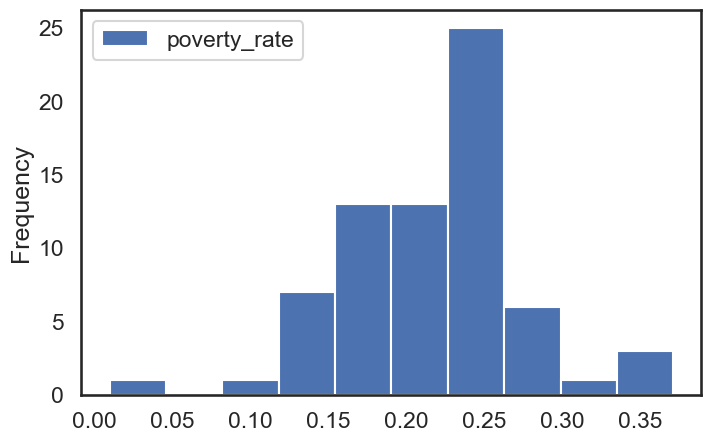

In [229]:
df_poverty.plot(kind='hist')


In [230]:
# assign zipcodes with lower than median poverty rate, poverty cateogry blue (richer)
df_zip_price_poverty.loc[
    df_zip_price_poverty['poverty_rate'] < poverty_median, 'poverty_category'
    ] = 'lower poverty rate'
# assign zipcodes with higher than median poverty rate, poverty cateogry red (poorer)
df_zip_price_poverty.loc[
    df_zip_price_poverty['poverty_rate'] > poverty_median, 'poverty_category'
    ] = 'higher poverty rate'


In [231]:
df_zip_price_poverty


,zipcode,price_mean,price_std,poverty_rate,poverty_category
0,98002,234284.035,52041.449,0.252,higher poverty rate
1,98168,240328.372,69984.819,0.255,higher poverty rate
2,98032,251296.240,64705.426,0.251,higher poverty rate
3,98001,281194.870,98837.431,0.236,higher poverty rate
4,98148,284908.596,89616.940,0.186,lower poverty rate
...,...,...,...,...,...
65,98102,899607.673,790381.367,0.149,lower poverty rate
66,98112,1096239.007,594223.176,0.200,lower poverty rate
67,98040,1194873.638,607767.642,0.229,higher poverty rate
68,98004,1356523.991,746094.067,0.214,lower poverty rate


### House prices vs poverty rate

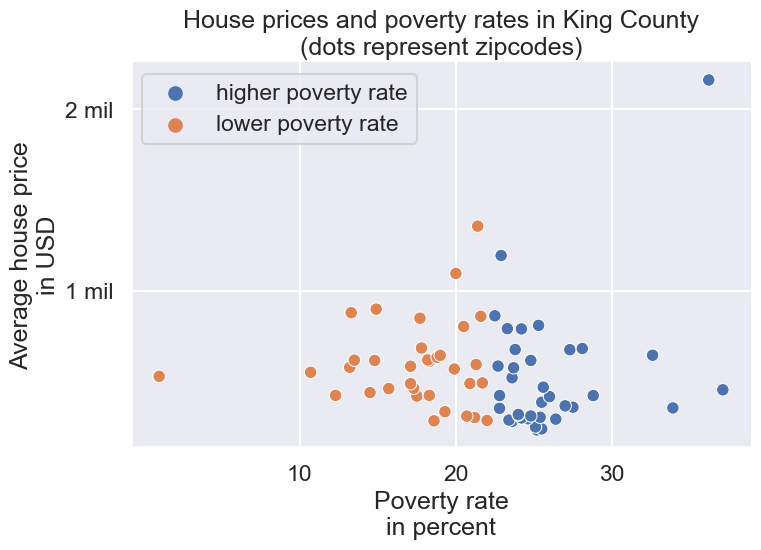

In [232]:
# Plot for presentation: house prices against the poverty rate,
# separated by below and obove the (real) median povery rate of King County

sns.set_theme(context='talk', style='darkgrid', palette='deep', color_codes=True)
g = sns.scatterplot(data=df_zip_price_poverty, x='poverty_rate', y='price_mean', hue='poverty_category')
sns.despine()
plt.title('House prices and poverty rates in King County\n(dots represent zipcodes)')

plt.xticks([0.10, 0.20, 0.30], ['10', '20', '30'])
plt.xlabel('Poverty rate\nin percent')

plt.yticks([1000000, 2000000], ['1 mil', '2 mil'])
plt.ylabel('Average house price\nin USD')
plt.legend(title='')

plt.savefig('price_v_poverty.png', dpi=300, bbox_inches='tight')


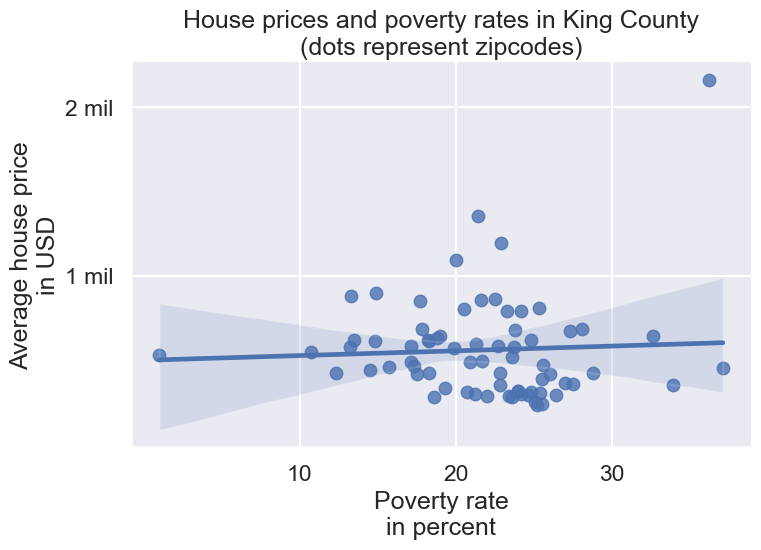

In [233]:
# Plot for presentation: Linear regression of prices and poverty rate

sns.set_theme(context='talk', style='darkgrid', palette='deep', color_codes=True)

sns.regplot(data=df_zip_price_poverty, x='poverty_rate', y='price_mean', ci=95)

sns.despine()
plt.title('House prices and poverty rates in King County\n(dots represent zipcodes)')

plt.xticks([0.10, 0.20, 0.30], ['10', '20', '30'])
plt.xlabel('Poverty rate\nin percent')

plt.yticks([1000000, 2000000], ['1 mil', '2 mil'])
plt.ylabel('Average house price\nin USD')
#plt.legend(title='')

plt.savefig('price_v_poverty_reg.png', dpi=300, bbox_inches='tight')


### Areas with big variations in prices

- to invest in to prevent gentrification (socially responsible)

In [234]:
df.groupby('zipcode').price.std()


zipcode
98001    98837.431
98002    52041.449
98003   107597.662
98004   746094.067
98005   268979.168
           ...    
98177   436379.740
98178   161044.746
98188   103106.580
98198   154906.277
98199   398428.722
Name: price, Length: 70, dtype: float64

<Axes: xlabel='zipcode'>

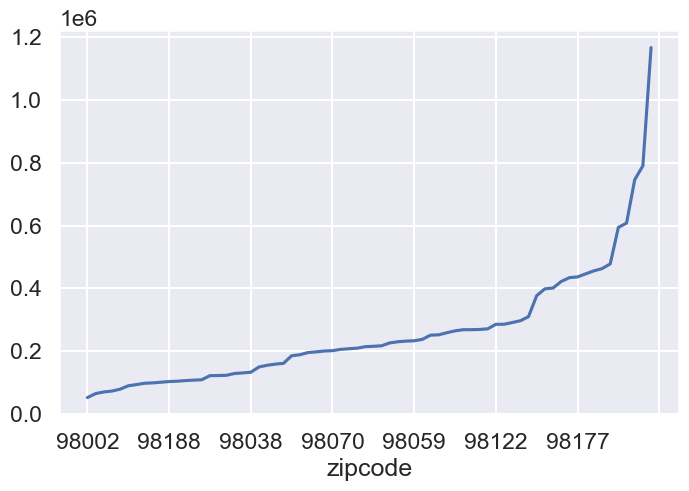

In [235]:
df.groupby('zipcode').price.std().sort_values().plot()


<Axes: ylabel='Frequency'>

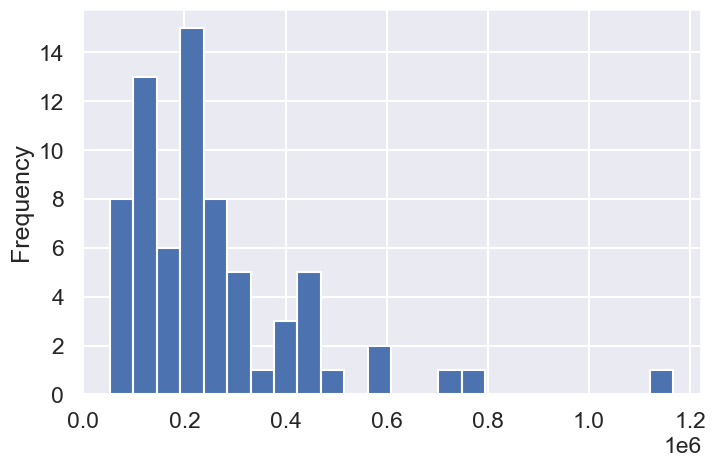

In [236]:
df.groupby('zipcode').price.std().sort_values().plot(kind='hist', bins=24)


<Axes: >

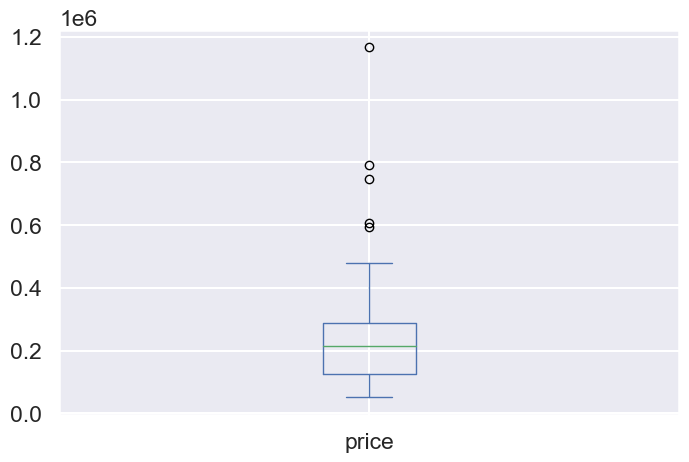

In [237]:
df.groupby('zipcode').price.std().sort_values().plot(kind='box')


In [238]:
# the 75% quartile around 300k looks like a good cutoff point for price variety areas
 
sd_cutoff = df.groupby('zipcode').price.std().describe()['75%']
sd_cutoff


289643.21470565966

In [239]:
price_sd = df.groupby('zipcode').price.std().rename('price_sd').sort_values()
price_sd


zipcode
98002     52041.449
98032     64705.426
98168     69984.819
98030     72808.099
98031     78752.944
            ...    
98112    594223.176
98040    607767.642
98004    746094.067
98102    790381.367
98039   1166904.399
Name: price_sd, Length: 70, dtype: float64

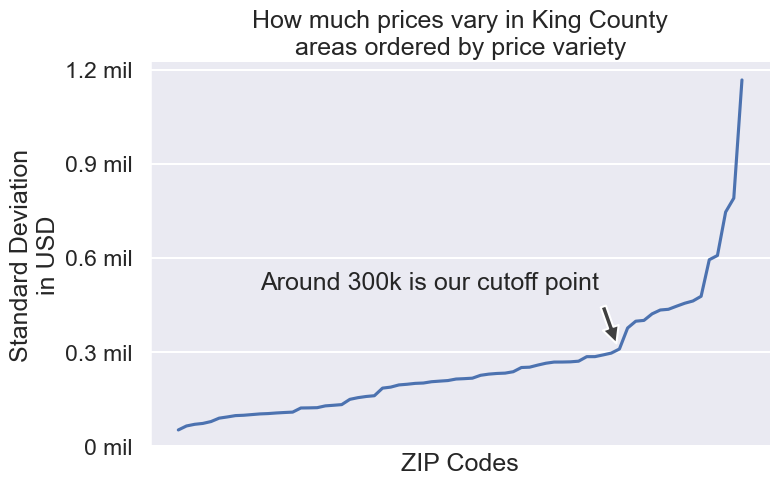

In [240]:
# Plot for presentation: show the variation (sd) of prices per area in order to demonstrate the cutoff point 75%
 
sns.set_theme(context='talk', style='darkgrid', palette='deep', color_codes=True)

sns.lineplot(data=price_sd)

sns.despine()
plt.title('How much prices vary in King County\nareas ordered by price variety')

plt.xticks([])
plt.xlabel('ZIP Codes')

plt.yticks([0, 300000, 600000, 900000, 1200000], ['0 mil', '0.3 mil', '0.6 mil', '0.9 mil', '1.2 mil'])
plt.ylabel('Standard Deviation\nin USD')

plt.annotate(
    'Around 300k is our cutoff point', 
    xy=(54, 300000), 
    xytext=(10, 500000), 
    arrowprops=dict(facecolor='0.25', shrink=0.15)
    )

plt.savefig('sd_cutoff.png', dpi=300, bbox_inches='tight')


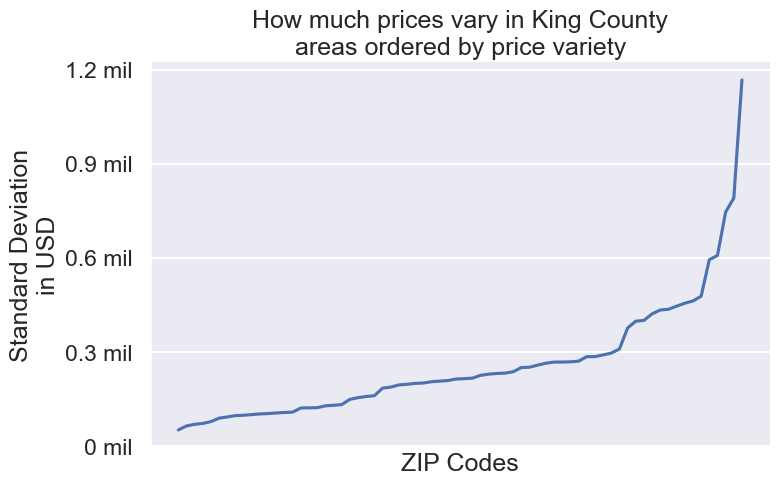

In [241]:
# Plot for presentation: show the variation (sd) of prices per area in order to demonstrate the cutoff point 75%
 
sns.set_theme(context='talk', style='darkgrid', palette='deep', color_codes=True)

sns.lineplot(data=price_sd)

sns.despine()
plt.title('How much prices vary in King County\nareas ordered by price variety')

plt.xticks([])
plt.xlabel('ZIP Codes')

plt.yticks([0, 300000, 600000, 900000, 1200000], ['0 mil', '0.3 mil', '0.6 mil', '0.9 mil', '1.2 mil'])
plt.ylabel('Standard Deviation\nin USD')
'''
plt.annotate(
    'Around 300k is our cutoff point', 
    xy=(54, 300000), 
    xytext=(10, 500000), 
    arrowprops=dict(facecolor='0.25', shrink=0.15)
    )
'''
plt.savefig('sd.png', dpi=300, bbox_inches='tight')


In [242]:
# Get the subset of zip codes with more than cutoff sd prices

zip_high_sd = df.groupby('zipcode').price.std() > sd_cutoff
zip_high_sd = zip_high_sd[zip_high_sd == True].reset_index().zipcode.to_list()
zip_high_sd


['98004',
 '98006',
 '98008',
 '98024',
 '98027',
 '98033',
 '98034',
 '98039',
 '98040',
 '98102',
 '98105',
 '98109',
 '98112',
 '98119',
 '98144',
 '98166',
 '98177',
 '98199']

<Axes: >

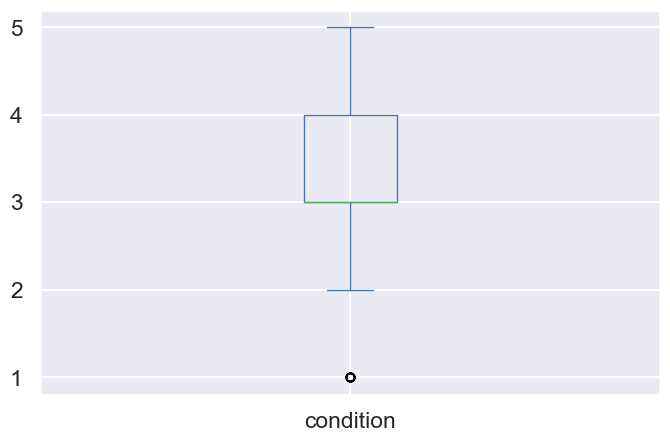

In [244]:
# Houses with low condition

df.condition.plot(kind='box')


In [245]:
# Client recommendation: Houses with low condition (below 3) and in high variance areas

house_id_high_sd_low_condition = df[df.zipcode.isin(zip_high_sd)][df.condition < 3].id.to_list()
house_id_high_sd_low_condition


[1665400045,
 5175800060,
 1498302774,
 4337000160,
 3623500135,
 3886902445,
 2128000160,
 2726059100,
 1900000195,
 1924079091,
 5145100080,
 1498302783,
 3885808035,
 1221000395,
 9429500146,
 6613000935,
 1900000060,
 6072760390,
 1219000120,
 6788200605,
 1233100351,
 5015001680,
 2425700022,
 2206900065,
 9828701745,
 9808700025,
 5459500165,
 1324079029]

In [246]:
len(house_id_high_sd_low_condition)


28